In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

# Training Set 1

In [5]:
burn_lc = pd.read_csv('../results/21jul2018/trainset_1_fissact_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../results/21jul2018/trainset_1_fissact_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../results/21jul2018/trainset_1_fissact_cooling_learning_curve.csv')
rxtr_lc = pd.read_csv('../results/21jul2018/trainset_1_fissact_reactor_learning_curve.csv')

In [6]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [7]:
burn_lc.sample(10)

,TrainSizeFrac,AbsTrainSize,TrainScore,CV-Score,Algorithm,Parameter
5,0.55,972,1.0,0.999948,dtree,Burnup [MWd/MTU]
29,1.00,1769,1.0,1.000000,xtree,Burnup [MWd/MTU]
0,0.10,176,1.0,0.999010,dtree,Burnup [MWd/MTU]
9,0.75,1326,1.0,1.000000,dtree,Burnup [MWd/MTU]
11,0.85,1503,1.0,1.000000,dtree,Burnup [MWd/MTU]
31,0.20,353,1.0,1.000000,bayes,Burnup [MWd/MTU]
39,0.75,1326,1.0,1.000000,bayes,Burnup [MWd/MTU]
18,0.40,707,1.0,0.999967,xtree,Burnup [MWd/MTU]
3,0.40,707,1.0,0.999983,dtree,Burnup [MWd/MTU]
14,1.00,1769,1.0,1.000000,dtree,Burnup [MWd/MTU]


## kNN

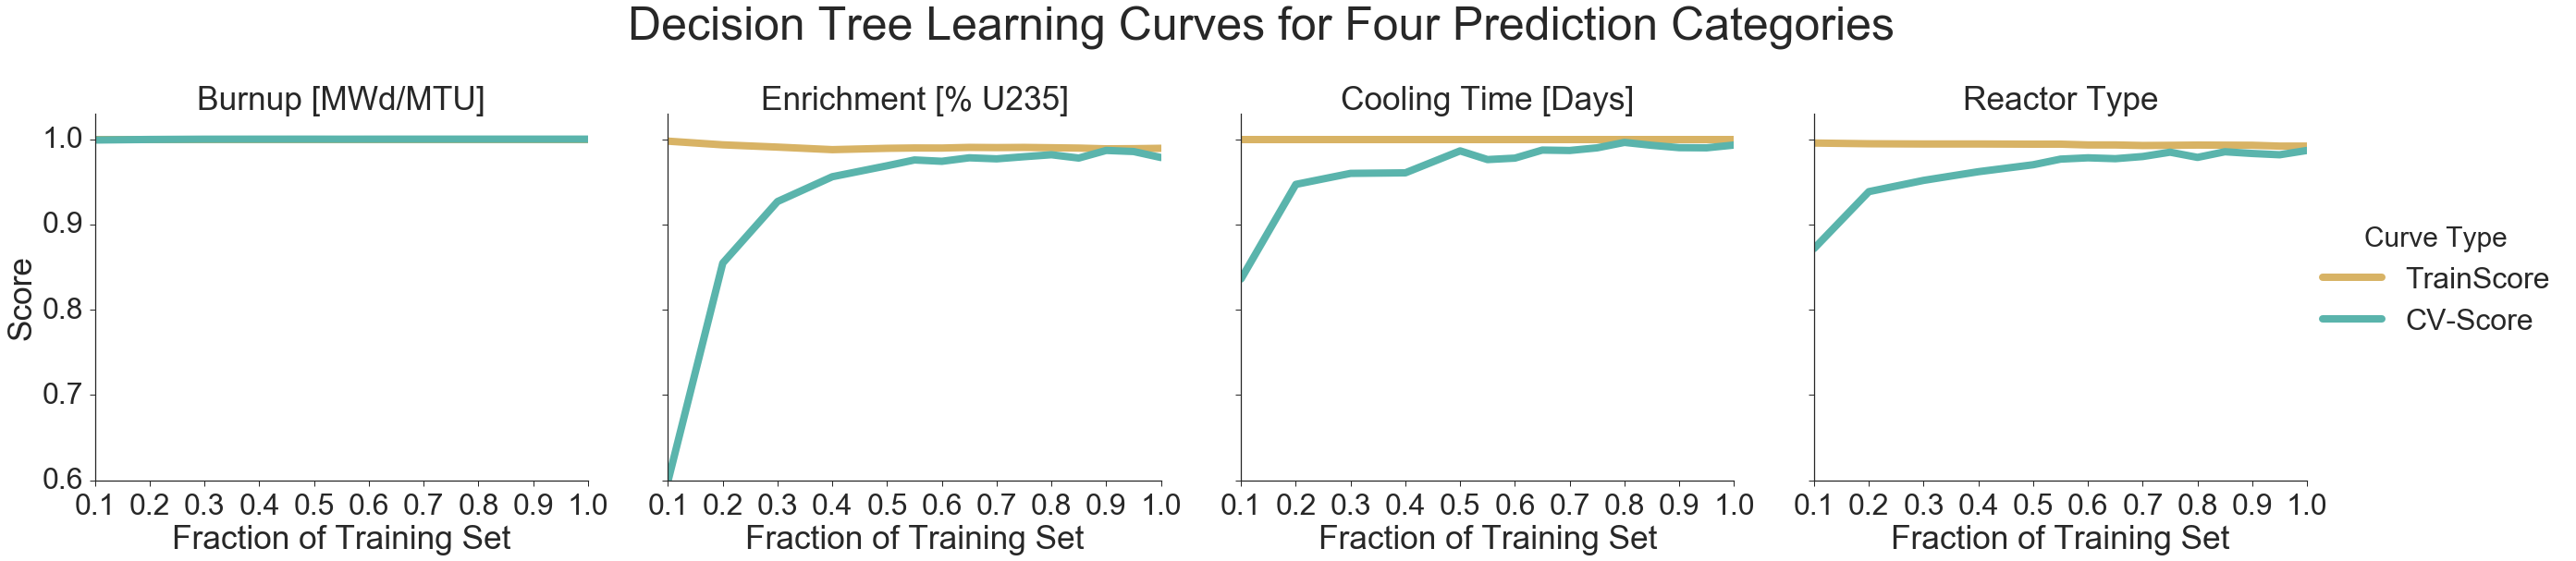

In [8]:
knn_b = burn_lc.loc[(burn_lc['Algorithm']=='dtree')]
knn_e = enri_lc.loc[(enri_lc['Algorithm']=='dtree')]
knn_c = cool_lc.loc[(cool_lc['Algorithm']=='dtree')]
knn_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='dtree')]

plt.clf()
sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.6, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Decision Tree Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/1knn_fissact_learning.png', bbox_inches='tight', transparent=True)

## Ridge

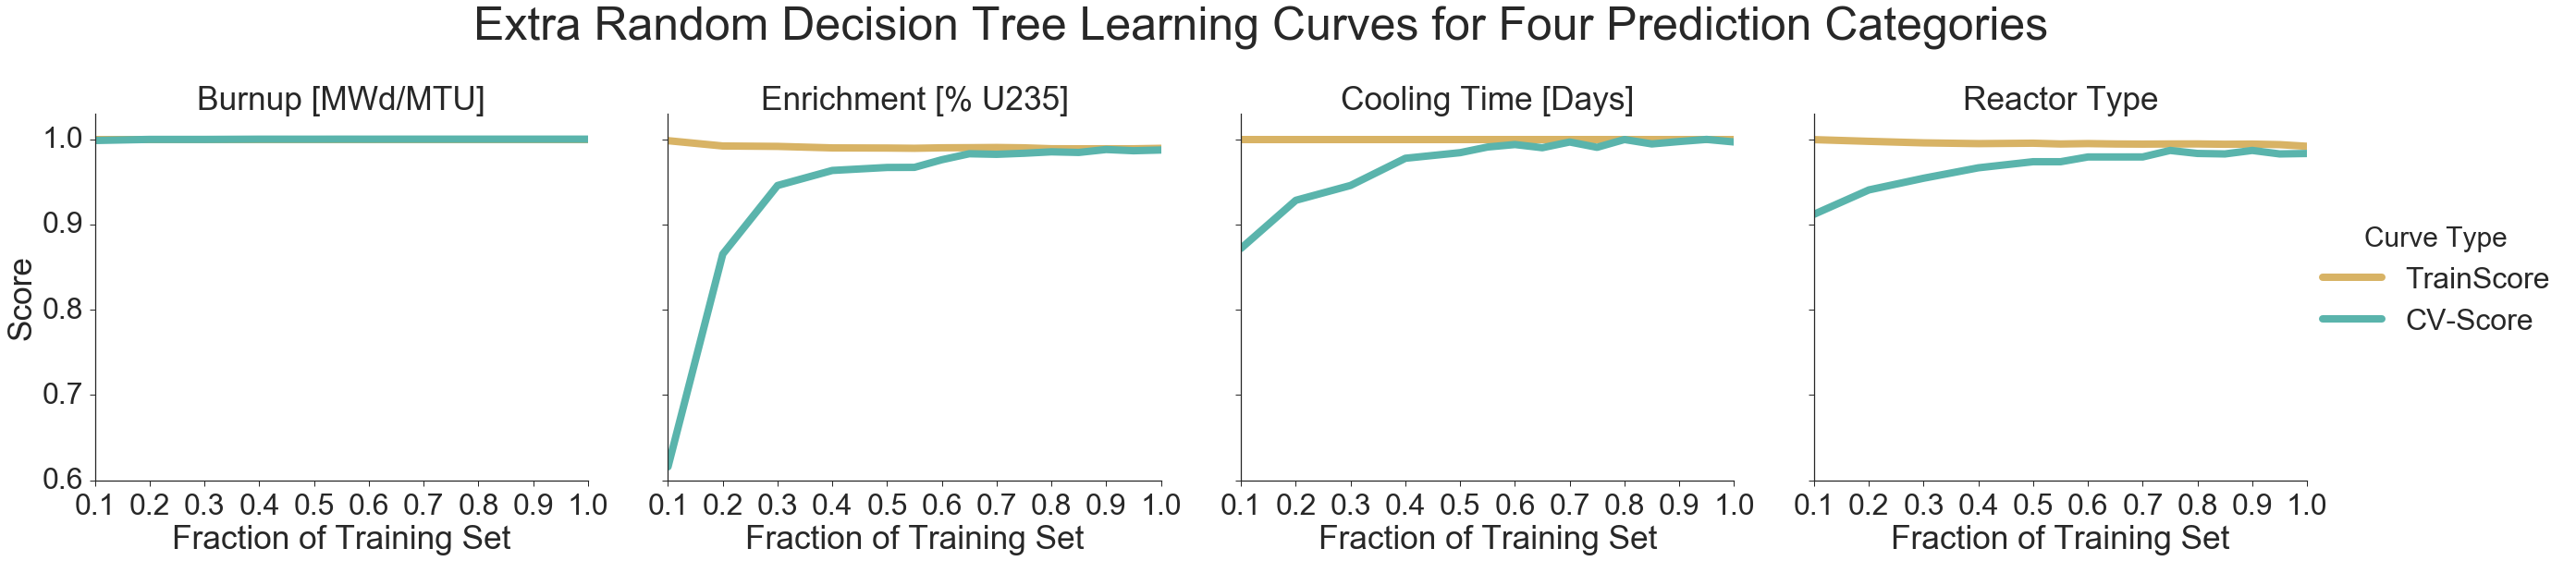

In [10]:
rr_b = burn_lc.loc[(burn_lc['Algorithm']=='xtree')]
rr_e = enri_lc.loc[(enri_lc['Algorithm']=='xtree')]
rr_c = cool_lc.loc[(cool_lc['Algorithm']=='xtree')]
rr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='xtree')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.6, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Extra Random Decision Tree Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/1rr_fissact_learning.png', bbox_inches='tight', transparent=True)

## SVR

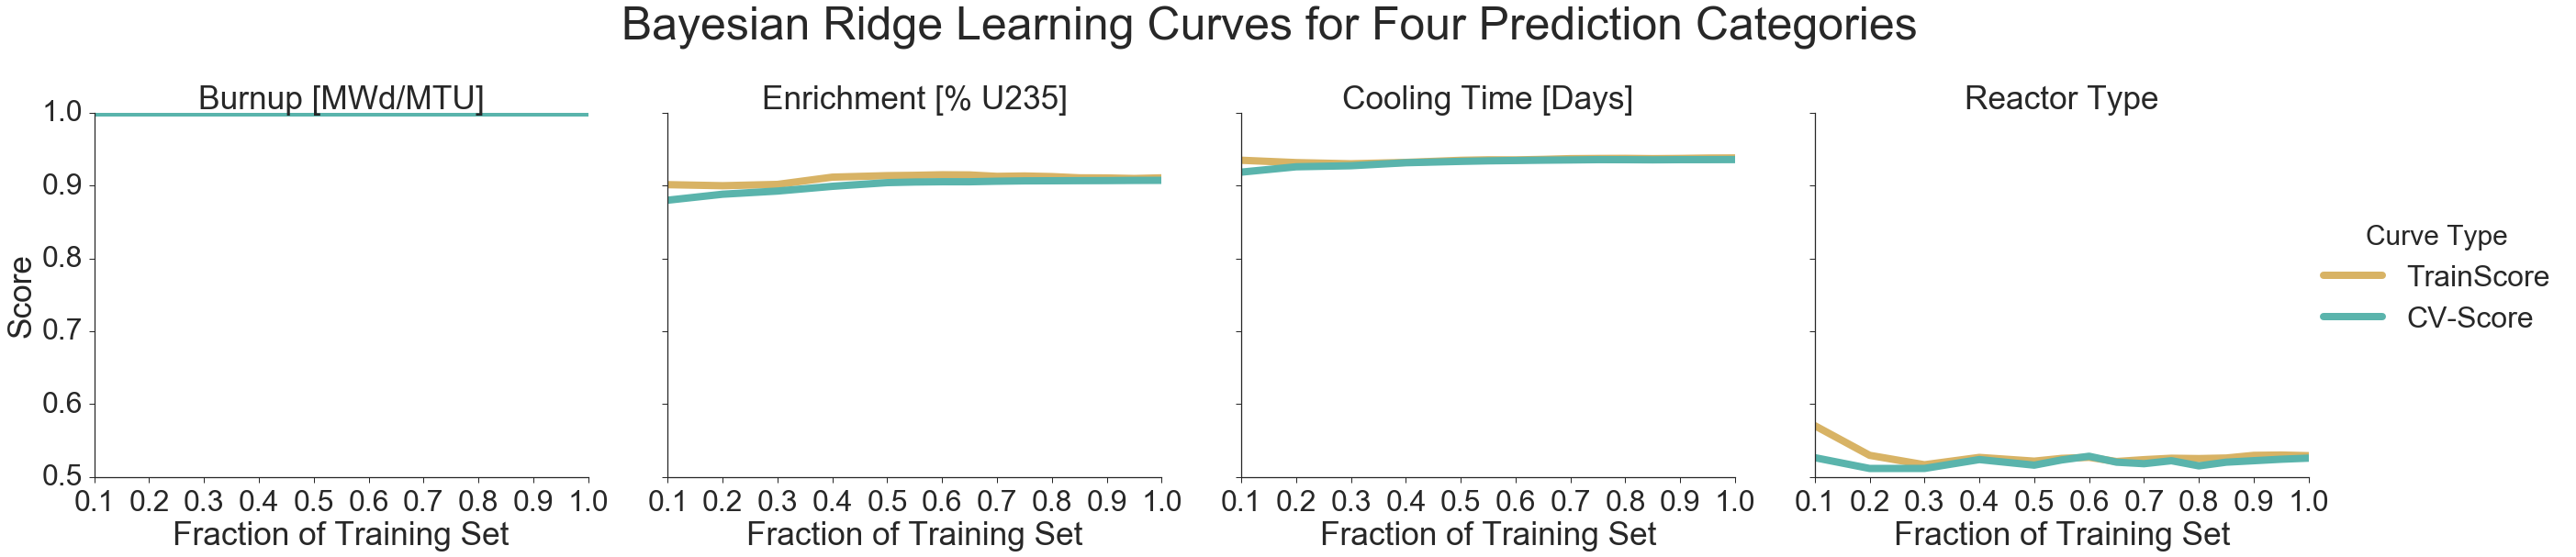

In [12]:
svr_b = burn_lc.loc[(burn_lc['Algorithm']=='bayes')]
svr_e = enri_lc.loc[(enri_lc['Algorithm']=='bayes')]
svr_c = cool_lc.loc[(cool_lc['Algorithm']=='bayes')]
svr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='bayes')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   #.set(ylim=(0.6, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Bayesian Ridge Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/1svr_fissact_learning.png', bbox_inches='tight', transparent=True)

# Training Set 2

In [15]:
burn_lc = pd.read_csv('../results/21jul2018/trainset_2_fissact_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../results/21jul2018/trainset_2_fissact_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../results/21jul2018/trainset_2_fissact_cooling_learning_curve.csv')
rxtr_lc = pd.read_csv('../results/21jul2018/trainset_2_fissact_reactor_learning_curve.csv')

In [16]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

# kNN

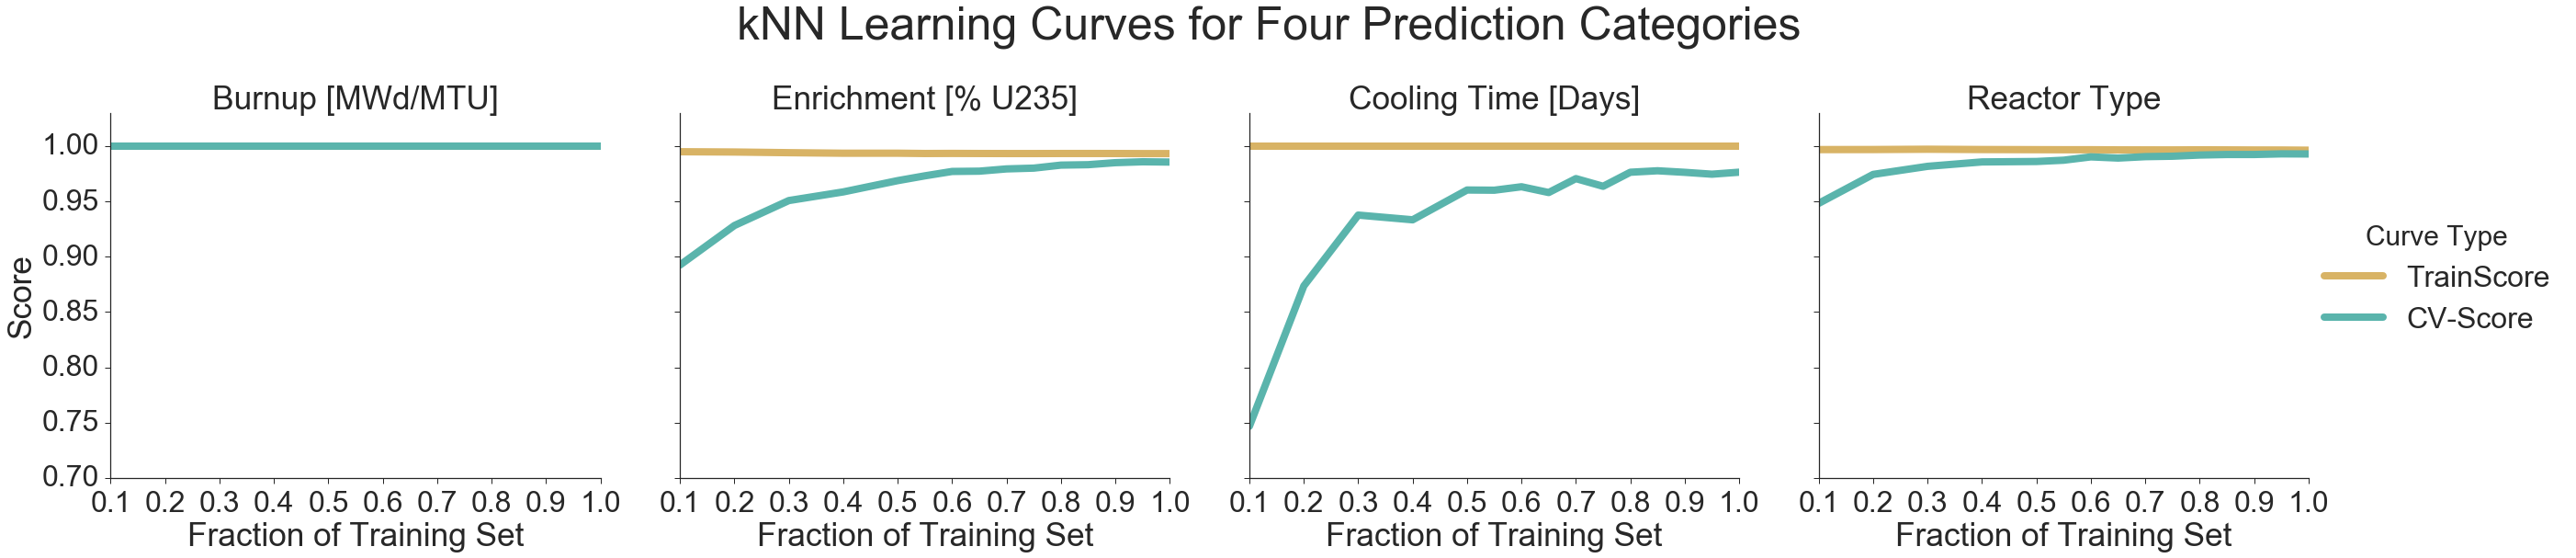

In [17]:
knn_b = burn_lc.loc[(burn_lc['Algorithm']=='dtree')]
knn_e = enri_lc.loc[(enri_lc['Algorithm']=='dtree')]
knn_c = cool_lc.loc[(cool_lc['Algorithm']=='dtree')]
knn_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='dtree')]

plt.clf()
sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([knn_b, knn_e, knn_c, knn_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.7, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('kNN Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/2knn_fissact_learning.png', bbox_inches='tight', transparent=True)

## Ridge

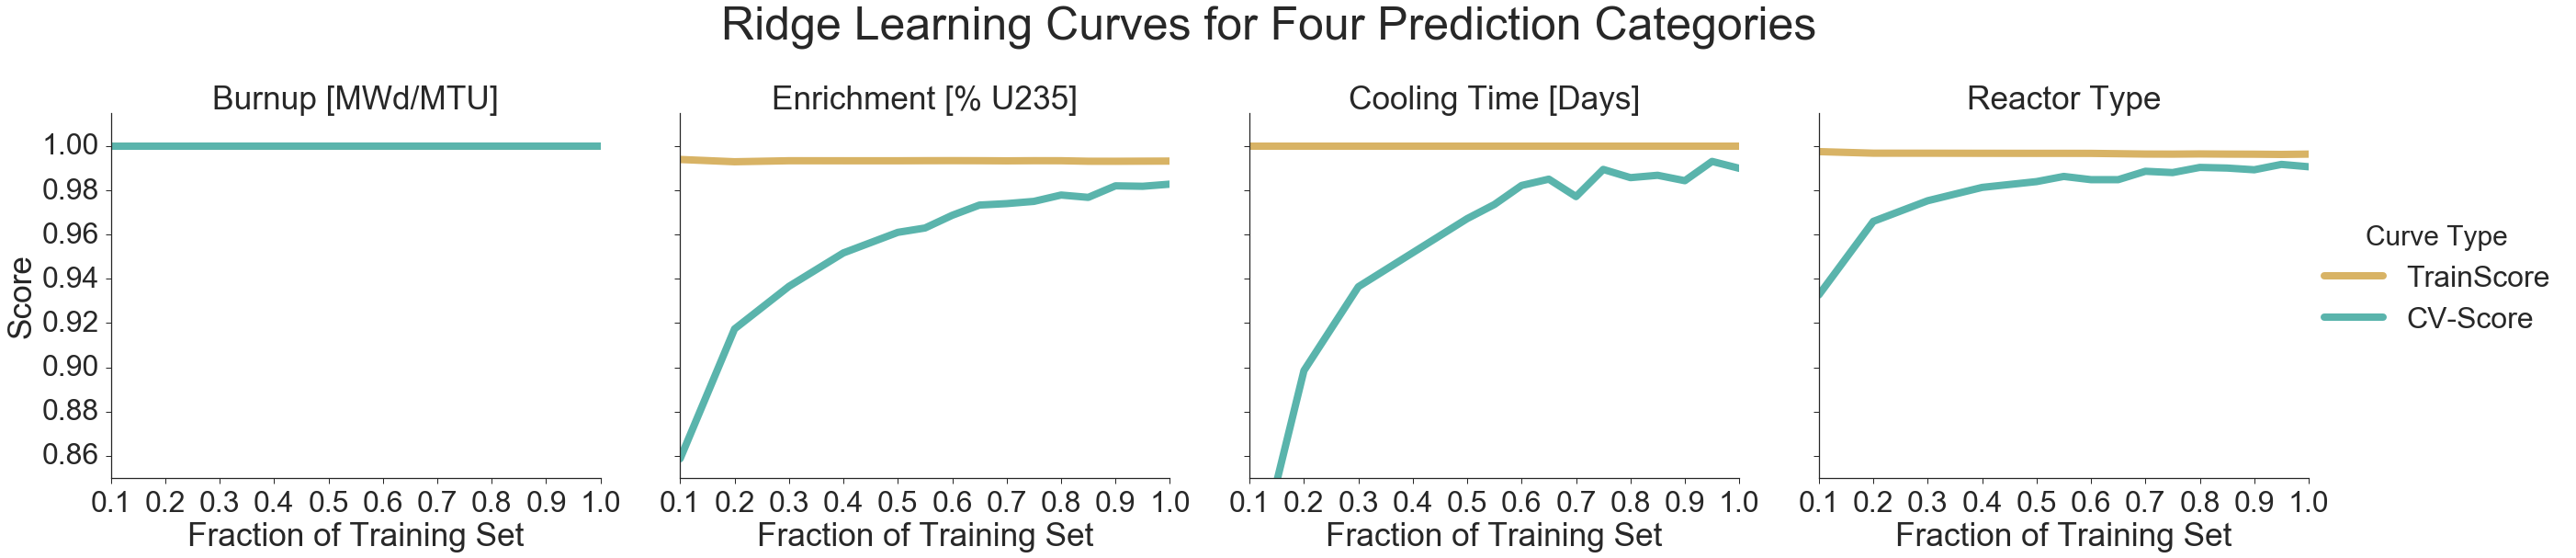

In [18]:
rr_b = burn_lc.loc[(burn_lc['Algorithm']=='xtree')]
rr_e = enri_lc.loc[(enri_lc['Algorithm']=='xtree')]
rr_c = cool_lc.loc[(cool_lc['Algorithm']=='xtree')]
rr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='xtree')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([rr_b, rr_e, rr_c, rr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   .set(ylim=(0.85, 1.015))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('Ridge Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/2rr_fissact_learning.png', bbox_inches='tight', transparent=True)

## SVR

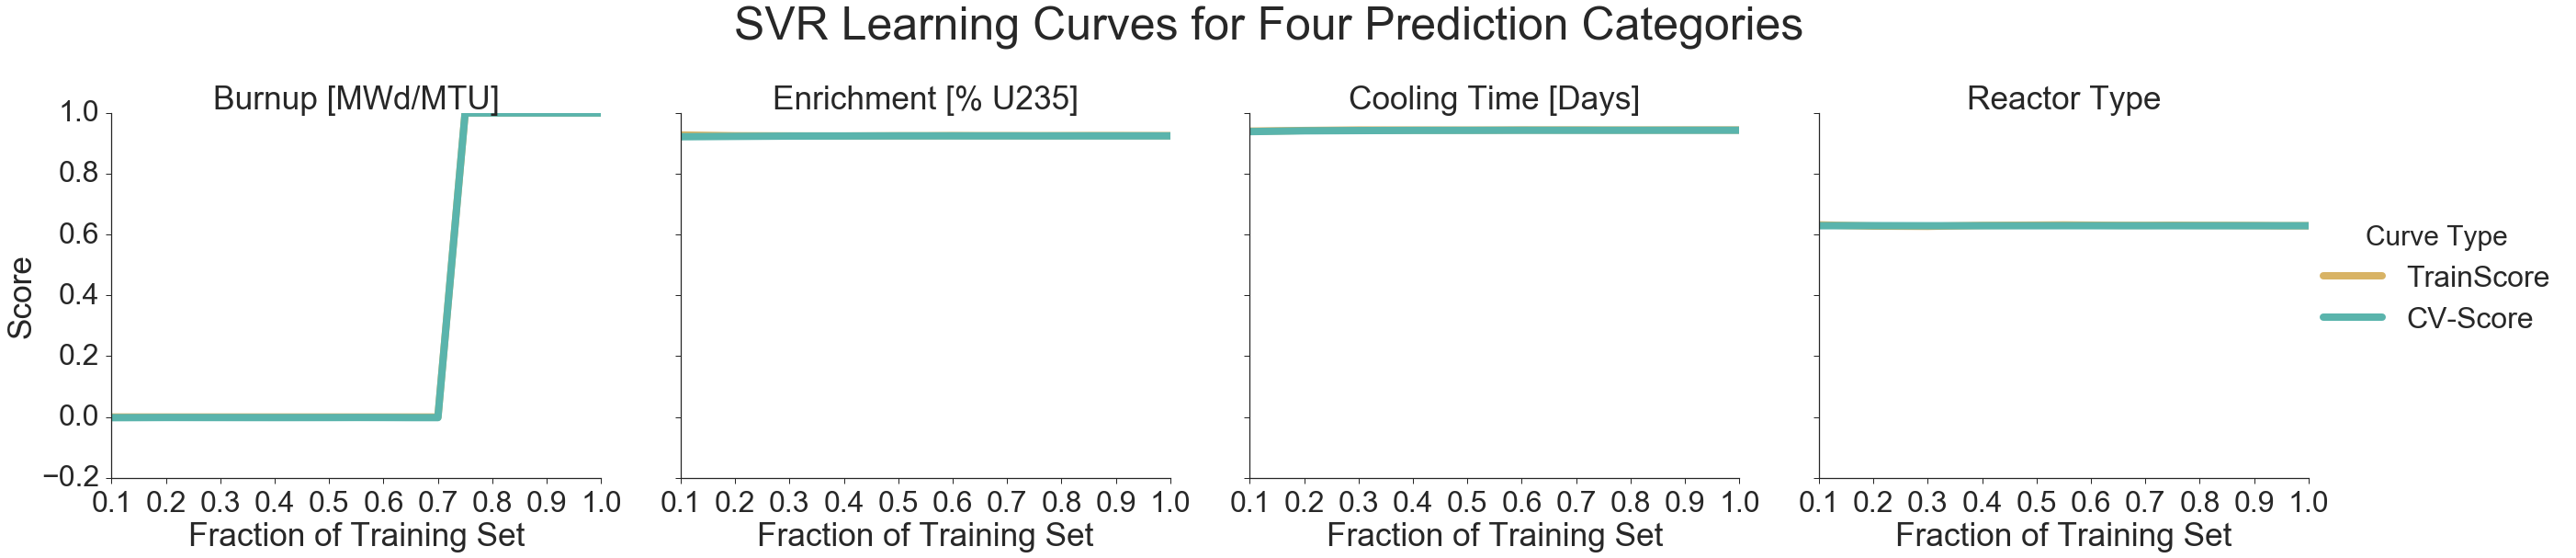

In [20]:
svr_b = burn_lc.loc[(burn_lc['Algorithm']=='bayes')]
svr_e = enri_lc.loc[(enri_lc['Algorithm']=='bayes')]
svr_c = cool_lc.loc[(cool_lc['Algorithm']=='bayes')]
svr_r = rxtr_lc.loc[(rxtr_lc['Algorithm']=='bayes')]

plt.clf()

sns.set(style="ticks", font_scale=3.2)

df = pd.DataFrame()
df = pd.concat([svr_b, svr_e, svr_c, svr_r])
df = df.melt(id_vars = ['TrainSizeFrac', 'Parameter'], 
             value_vars = ['TrainScore', 'CV-Score'], 
             value_name='Score', var_name='Curve Type')

vc = sns.FacetGrid(data=df, col="Parameter", hue="Curve Type", 
                   sharex=True, sharey=True, size=9, 
                   palette=sns.color_palette(med))
vc.map(plt.plot, 'TrainSizeFrac', 'Score', linewidth=8)

(vc.set_axis_labels('Fraction of Training Set', 'Score')
   #.set(ylim=(0.4, 1.03))
   .set_titles('{col_name}')
   .add_legend()
   .fig.suptitle('SVR Learning Curves for Four Prediction Categories', fontsize=50))
plt.subplots_adjust(top=.8)

vc.savefig('../results/21jul2018/graphs/2svr_fissact_learning.png', bbox_inches='tight', transparent=True)